# Import Library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Koneksi ke Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Split Data train, Data valid, Data test

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
input_file = 'drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1'
output_file = 'drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted'

In [ ]:
splitfolders.ratio(input_file, output=output_file, seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)

Copying files: 2260 files [00:52, 42.88 files/s]


In [ ]:
# cacar monyet
camor_train='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/train/cacar_monyet'
camor_test='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/test/cacar_monyet'
camor_val='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/val/cacar_monyet'

# directory path
lst1 = os.listdir(camor_train)
lst2 = os.listdir(camor_test)
lst3 = os.listdir(camor_val)

number_files1 = len(lst1)
number_files2 = len(lst2)
number_files3 = len(lst3)
print("Jumlah data train kelas cacar monyet = ", number_files1)
print("Jumlah data test kelas cacar monyet = ", number_files2)
print("Jumlah data val kelas cacar monyet = ", number_files3)

# cacar air
cair_train='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/train/cacar_air'
cair_test='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/test/cacar_air'
cair_val='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/val/cacar_air'

# directory path
lst4 = os.listdir(cair_train)
lst5 = os.listdir(cair_test)
lst6 = os.listdir(cair_val)

number_files4 = len(lst4)
number_files5 = len(lst5)
number_files6 = len(lst6)
print("")
print("Jumlah data train kelas cacar air = ", number_files4)
print("Jumlah data test kelas cacar air = ", number_files5)
print("Jumlah data val kelas cacar air = ", number_files6)

# campak
campak_train='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/train/campak'
campak_test='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/test/campak'
campak_val='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/val/campak'

# directory path
lst7 = os.listdir(campak_train)
lst8 = os.listdir(campak_test)
lst9 = os.listdir(campak_val)

number_files7 = len(lst7)
number_files8 = len(lst8)
number_files9 = len(lst9)
print("")
print("Jumlah data train kelas campak = ", number_files7)
print("Jumlah data test kelas campak = ", number_files8)
print("Jumlah data val kelas campak = ", number_files9)

# normal
normal_train='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/train/normal'
normal_test='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/test/normal'
normal_val='drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/val/normal'

# directory path
lst11 = os.listdir(normal_train)
lst22 = os.listdir(normal_test)
lst33 = os.listdir(normal_val)

number_files11 = len(lst11)
number_files22 = len(lst22)
number_files33 = len(lst33)
print("")
print("Jumlah data train kelas normal = ", number_files11)
print("Jumlah data test kelas normal = ", number_files22)
print("Jumlah data val kelas normal = ", number_files33)

Jumlah data train kelas cacar monyet =  480
Jumlah data test kelas cacar monyet =  60
Jumlah data val kelas cacar monyet =  60

Jumlah data train kelas cacar air =  416
Jumlah data test kelas cacar air =  52
Jumlah data val kelas cacar air =  52

Jumlah data train kelas campak =  432
Jumlah data test kelas campak =  54
Jumlah data val kelas campak =  54

Jumlah data train kelas normal =  480
Jumlah data test kelas normal =  60
Jumlah data val kelas normal =  60


In [ ]:
# folder_name = ['cacar_air', 'cacar_monyet', 'campak', 'normal']

In [ ]:
# os.chdir('drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1')
# if os.path.isdir('train/cacar_air/') is False:
#   os.mkdir('train')
#   os.mkdir('valid')
#   os.mkdir('test')

# for i in range(len(folder_name)):
#   shutil.move(f'{folder_name[i]}','train')
#   os.mkdir(f'valid/{folder_name[i]}')
#   os.mkdir(f'test/{folder_name[i]}')

#   valid_samples = random.sample(os.listdir(f'train/{folder_name[i]}'), 100)
#   for j in valid_samples:
#     shutil.move(f'train/{folder_name[i]}/{j}', f'valid/{folder_name[i]}')

#   test_samples = random.sample(os.listdir(f'train/{folder_name[i]}'), 50)
#   for k in test_samples:
#     shutil.move(f'train/{folder_name[i]}/{k}', f'test/{folder_name[i]}')

# os.chdir('../..')

# Build MobileNetV2 Model with Transfer Learning



In [ ]:
IMG_SHAPE = (128, 128, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
base_model.trainable = False # freeze seluruh lapisan pada base_model

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
#cek output
base_model.output

<KerasTensor: shape=(None, 4, 4, 1280) dtype=float32 (created by layer 'out_relu')>

In [ ]:
# custom head network / top layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=4, activation='softmax')(global_average_layer)

global_average_layer

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
#defining the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

# Tahap Pelatihan

In [ ]:
train_path = 'drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/train'
valid_path = 'drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/val'
test_path = 'drive/MyDrive/DATA/skripsi/dataset-rgb-fixed-1-splitted/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(128,128), batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(128,128), batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(128,128), batch_size=5, shuffle=False)

Found 1808 images belonging to 4 classes.
Found 226 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


# Train The Model

EPOCH 5

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"]) #v2

history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=5,
            verbose=2
)

Epoch 1/5
362/362 - 35s - loss: 1.2159 - accuracy: 0.4928 - val_loss: 0.7747 - val_accuracy: 0.6991 - 35s/epoch - 97ms/step
Epoch 2/5
362/362 - 30s - loss: 0.6283 - accuracy: 0.7782 - val_loss: 0.5423 - val_accuracy: 0.8496 - 30s/epoch - 84ms/step
Epoch 3/5
362/362 - 28s - loss: 0.4362 - accuracy: 0.8639 - val_loss: 0.4275 - val_accuracy: 0.8584 - 28s/epoch - 78ms/step
Epoch 4/5
362/362 - 31s - loss: 0.3346 - accuracy: 0.9071 - val_loss: 0.3680 - val_accuracy: 0.8894 - 31s/epoch - 84ms/step
Epoch 5/5
362/362 - 30s - loss: 0.2690 - accuracy: 0.9231 - val_loss: 0.3323 - val_accuracy: 0.8982 - 30s/epoch - 82ms/step


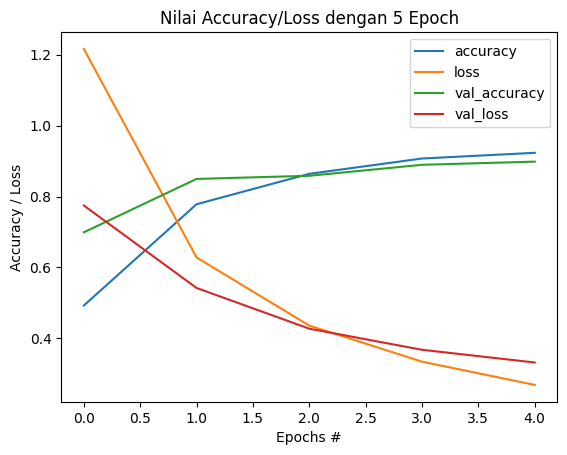

In [ ]:
# Plotting
hist = history.history

# Plot accuracy and loss
plt.plot(hist["accuracy"], label="accuracy")
plt.plot(hist["loss"], label="loss")

if "val_accuracy" in hist and "val_loss" in hist:
    plt.plot(hist["val_accuracy"], label="val_accuracy")
    plt.plot(hist["val_loss"], label="val_loss")

# Add the labels and legend
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()

# Finally show the plot
plt.title("Nilai Accuracy/Loss dengan 5 Epoch")
plt.show()

In [ ]:
test_labels = test_batches.classes

# TEST MODEL
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

46/46 - 4s - 4s/epoch - 79ms/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[48  3  0  1]
 [ 3 53  3  1]
 [ 0  1 52  1]
 [ 0  0  1 59]]


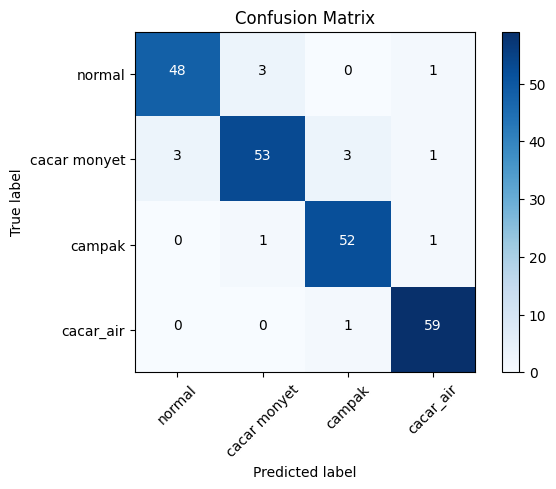

In [ ]:
cm_plot_labels = ['normal','cacar monyet','campak','cacar_air']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# classification report

print(classification_report(test_labels, predictions.argmax(axis=1), target_names=cm_plot_labels))

              precision    recall  f1-score   support

      normal       0.94      0.92      0.93        52
cacar monyet       0.93      0.88      0.91        60
      campak       0.93      0.96      0.95        54
   cacar_air       0.95      0.98      0.97        60

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



EPOCH 10

In [ ]:
#train the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"]) #v2
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #yg v1

#yg rgb 2000images
history1 = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=2
)

Epoch 1/10
332/332 - 40s - loss: 0.2482 - accuracy: 0.9313 - val_loss: 0.2459 - val_accuracy: 0.9325 - 40s/epoch - 120ms/step
Epoch 2/10
332/332 - 42s - loss: 0.1991 - accuracy: 0.9458 - val_loss: 0.2060 - val_accuracy: 0.9350 - 42s/epoch - 126ms/step
Epoch 3/10
332/332 - 36s - loss: 0.1645 - accuracy: 0.9590 - val_loss: 0.1859 - val_accuracy: 0.9475 - 36s/epoch - 109ms/step
Epoch 4/10
332/332 - 36s - loss: 0.1400 - accuracy: 0.9723 - val_loss: 0.1626 - val_accuracy: 0.9550 - 36s/epoch - 109ms/step
Epoch 5/10
332/332 - 35s - loss: 0.1199 - accuracy: 0.9801 - val_loss: 0.1447 - val_accuracy: 0.9600 - 35s/epoch - 106ms/step
Epoch 6/10
332/332 - 30s - loss: 0.1039 - accuracy: 0.9837 - val_loss: 0.1325 - val_accuracy: 0.9625 - 30s/epoch - 90ms/step
Epoch 7/10
332/332 - 35s - loss: 0.0913 - accuracy: 0.9880 - val_loss: 0.1196 - val_accuracy: 0.9675 - 35s/epoch - 105ms/step
Epoch 8/10
332/332 - 30s - loss: 0.0806 - accuracy: 0.9910 - val_loss: 0.1127 - val_accuracy: 0.9675 - 30s/epoch - 91ms

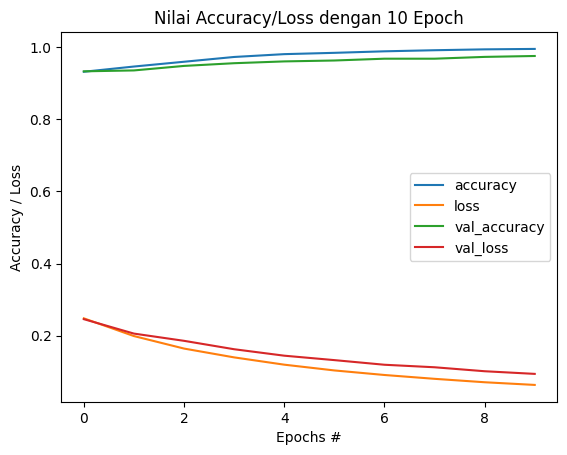

In [ ]:
# Plotting
hist = history1.history

# Plot accuracy and loss
plt.plot(hist["accuracy"], label="accuracy")
plt.plot(hist["loss"], label="loss")

if "val_accuracy" in hist and "val_loss" in hist:
    plt.plot(hist["val_accuracy"], label="val_accuracy")
    plt.plot(hist["val_loss"], label="val_loss")

# Add the labels and legend
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()

# Finally show the plot
plt.title("Nilai Accuracy/Loss dengan 10 Epoch")
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

40/40 - 4s - 4s/epoch - 89ms/step


In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[50  0  0  0]
 [ 1 49  0  0]
 [ 0  2 48  0]
 [ 0  0  0 50]]


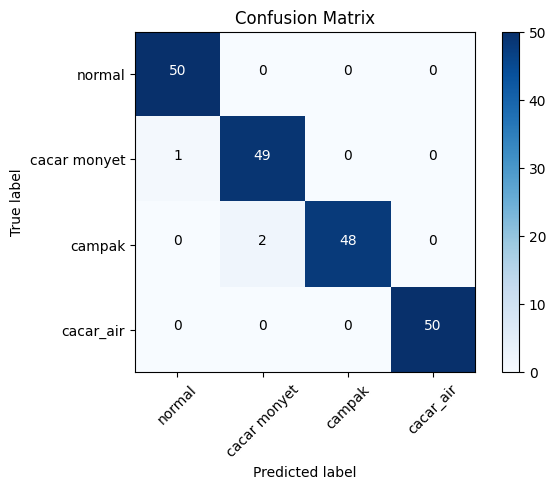

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# classification report

print(classification_report(test_labels, predictions.argmax(axis=1), target_names=cm_plot_labels))

              precision    recall  f1-score   support

      normal       0.98      1.00      0.99        50
cacar monyet       0.96      0.98      0.97        50
      campak       1.00      0.96      0.98        50
   cacar_air       1.00      1.00      1.00        50

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



EPOCH 15

In [ ]:
#train the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"]) #v2
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #yg v1

#yg rgb 2000images
history2 = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=15,
            verbose=2
)

Epoch 1/15
332/332 - 36s - loss: 0.0563 - accuracy: 0.9958 - val_loss: 0.0890 - val_accuracy: 0.9725 - 36s/epoch - 108ms/step
Epoch 2/15
332/332 - 34s - loss: 0.0486 - accuracy: 0.9970 - val_loss: 0.0818 - val_accuracy: 0.9825 - 34s/epoch - 102ms/step
Epoch 3/15
332/332 - 34s - loss: 0.0427 - accuracy: 0.9982 - val_loss: 0.0738 - val_accuracy: 0.9850 - 34s/epoch - 103ms/step
Epoch 4/15
332/332 - 35s - loss: 0.0377 - accuracy: 0.9988 - val_loss: 0.0684 - val_accuracy: 0.9900 - 35s/epoch - 107ms/step
Epoch 5/15
332/332 - 35s - loss: 0.0334 - accuracy: 0.9994 - val_loss: 0.0621 - val_accuracy: 0.9925 - 35s/epoch - 105ms/step
Epoch 6/15
332/332 - 34s - loss: 0.0297 - accuracy: 0.9994 - val_loss: 0.0630 - val_accuracy: 0.9875 - 34s/epoch - 102ms/step
Epoch 7/15
332/332 - 35s - loss: 0.0270 - accuracy: 0.9994 - val_loss: 0.0607 - val_accuracy: 0.9875 - 35s/epoch - 104ms/step
Epoch 8/15
332/332 - 35s - loss: 0.0243 - accuracy: 0.9994 - val_loss: 0.0534 - val_accuracy: 0.9925 - 35s/epoch - 107

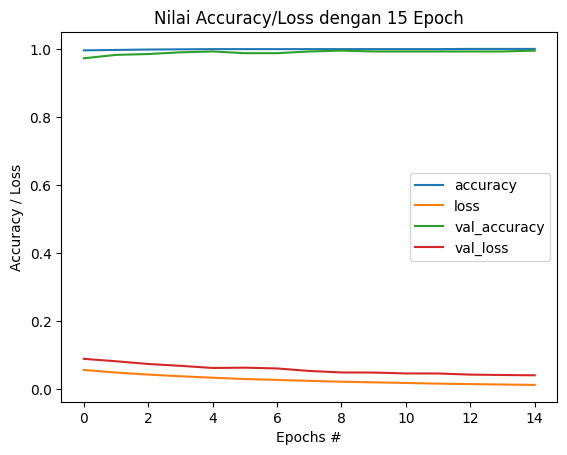

In [ ]:
# Plotting
hist = history2.history

# Plot accuracy and loss
plt.plot(hist["accuracy"], label="accuracy")
plt.plot(hist["loss"], label="loss")

if "val_accuracy" in hist and "val_loss" in hist:
    plt.plot(hist["val_accuracy"], label="val_accuracy")
    plt.plot(hist["val_loss"], label="val_loss")

# Add the labels and legend
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()

# Finally show the plot
plt.title("Nilai Accuracy/Loss dengan 15 Epoch")
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

40/40 - 3s - 3s/epoch - 68ms/step


In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[50  0  0  0]
 [ 0 50  0  0]
 [ 0  1 49  0]
 [ 0  0  0 50]]


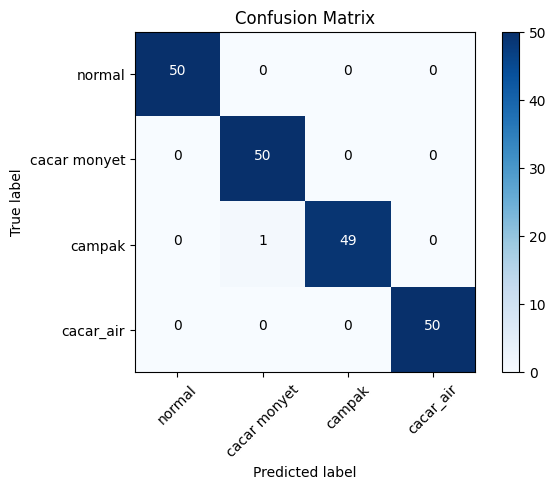

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# classification report

print(classification_report(test_labels, predictions.argmax(axis=1), target_names=cm_plot_labels))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        50
cacar monyet       0.98      1.00      0.99        50
      campak       1.00      0.98      0.99        50
   cacar_air       1.00      1.00      1.00        50

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
# model.save("drive/MyDrive/DATA/skripsi/monkeypox-rgb2260-mobilenetv2.h5")